### Example of computing binned reduced bispectrum

In [1]:
# load modules
import numpy as np
from cmblensplus import basic, curvedsky
import cmb
from matplotlib.pyplot import *

In [2]:
# define parameters
Tcmb = 2.726e6 # CMB temperature
lmax = 1024    # maximum multipole of output normalization
bn   = 20      # number of multipole bins

In [4]:
# choose multipoles within a multipole bin
bp = np.array([int(lmax*(i/bn)) for i in range(bn+1)])
bc = (bp[1:]+bp[:-1])*.5
sL = bp[:2]

In [5]:
# load unlensed and lensed Cls
ucl = cmb.read_camb_cls('../data/unlensedcls.dat',ftype='scal',output='array')[:,:lmax+1]

In [7]:
# generate gaussian phi
l = np.linspace(0,lmax,lmax+1)
glm = curvedsky.utils.gauss1alm(ucl[3,:]*l**2*(l+1)**2/4.)

In [9]:
# compute pmap = gmap + gmap**2
plm = curvedsky.bispec.make_quad_gauss(glm)

In [10]:
# compute binned bispectra
bl = np.zeros((4,bn))

In [12]:
hl = curvedsky.bispec.bispec_norm(bp,bstype='equi')

In [13]:
bl[0,:] = curvedsky.bispec.bispec_bin(bp,plm,bstype='equi') * np.sqrt(4*np.pi)/hl

In [14]:
hl = curvedsky.bispec.bispec_norm(bp,bstype='fold')

In [15]:
bl[1,:] = curvedsky.bispec.bispec_bin(bp,plm,bstype='fold') * np.sqrt(4*np.pi)/hl

In [16]:
hl = curvedsky.bispec.bispec_norm(bp,bstype='sque',sL=sL)
bl[2,:] = curvedsky.bispec.bispec_bin(bp,plm,bstype='sque',sL=sL) * np.sqrt(4*np.pi)/hl

In [17]:
hl = curvedsky.bispec.bispec_norm(bp,bstype='isos')
bl[3,:] = curvedsky.bispec.bispec_bin(bp,plm,bstype='isos')* np.sqrt(4*np.pi)/hl

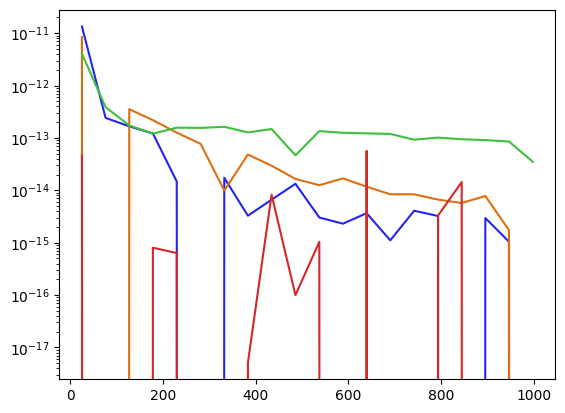

In [18]:
yscale('log')
s = 1.
plot(bc,s*bl[0,:])
plot(bc,s*bl[1,:])
plot(bc,s*bl[2,:])
plot(bc,s*bl[3,:])